# find_peaks

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.filters.find_peaks))

---
 ## Documentation for ``find_peaks``
 ---
**<span style="color:purple">find&#95;peaks</span>_(dt, r_max=4, footprint=None, **kwargs)_**


Finds local maxima in the distance transform


#### Parameters
* dt : <b><i>ndarray</i></b>  The distance transform of the pore space.  This may be calculated
	and filtered using any means desired.
* r_max : <b><i>scalar</i></b>  The size of the structuring element used in the maximum filter.
	This controls the localness of any maxima. The default is 4 voxels.
* footprint : <b><i>ND-array</i></b>  Specifies the shape of the structuring element used to define the
	neighborhood when looking for peaks.  If ``None`` (the default) is
	specified then a spherical shape is used (or circular in 2D).

#### Returns
* image : <b><i>ndarray</i></b>  An array of booleans with ``True`` values at the location of any
	local maxima.

#### Notes
It is also possible ot the ``peak_local_max`` function from the
``skimage.feature`` module as follows:

``peaks = peak_local_max(image=dt, min_distance=r, exclude_border=0,
indices=False)``

The *skimage* function automatically uses a square structuring element
which is significantly faster than using a circular or spherical
element.
---

## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

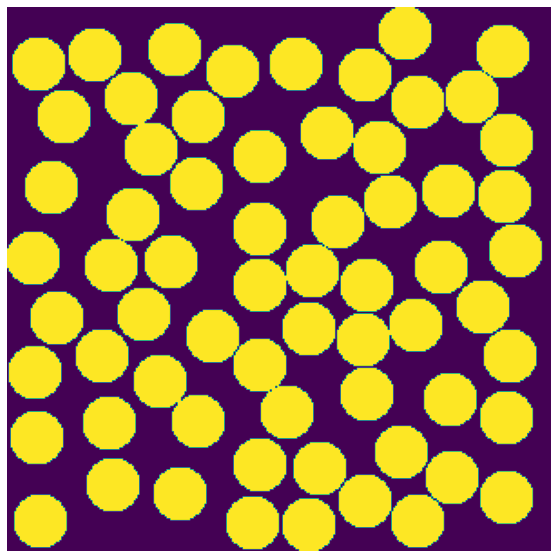

In [3]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=15, volume_fraction=0.5)
dt = ps.filters.distance_transform_lin(im, axis = 1, mode = "both")
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
r_max = 4
footprint = None

## Apply filter function:
With different parameters

### r_max

Text(0.5, 1.0, 'r_max = 25')

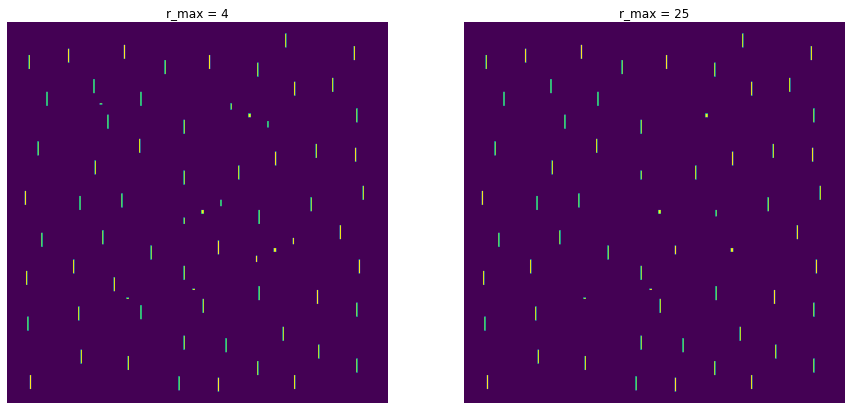

In [4]:
x = ps.filters.find_peaks(dt=dt, r_max=r_max, footprint=footprint)
xx = ps.filters.find_peaks(dt=dt, r_max=25, footprint=footprint)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('r_max = 4')
ax[1].set_title('r_max = 25')
